## Libraries and Dataset

To perform the analysis, we need three libraries: Pandas, Matplotlib, and Seaborn. We will use games.csv and club.csv dataset.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_games = pd.read_csv('./Dataset/games.csv')
df_club = pd.read_csv('./Dataset/clubs.csv')

### Filtering Data

Our analysis focuses on the **2023-2024 season** and Europe’s **Big Five Leagues**.


In [2]:
list_big_five_championship = ['FR1', 'ES1', 'IT1', 'GB1', 'L1'] #Code Id Big Five Leagues

start_season = '2023-08-01'
end_season = '2024-07-01'

df_games["date"] = pd.to_datetime(df_games["date"])
df_games_big_five = df_games[df_games['competition_id'].isin(list_big_five_championship)]
df_games_big_five = df_games_big_five[(df_games_big_five["date"]>=start_season) &
                                      (df_games_big_five["date"]<=end_season)]

df_club_big_five = df_club[df_club["domestic_competition_id"].isin(list_big_five_championship)]
df_club_big_five.set_index("club_id",inplace=True)

### Team Statistics

We’ll group the data by team to calculate the total goals scored and conceded during the 2023-2024 season. \
To get started, we need to reorganize the df_games_big_five dataframe, which holds the results of every match from the season.

In [3]:
df_games_big_five.head(10)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
2619,4087929,GB1,2023,1. Matchday,2023-08-12,350.0,873.0,0.0,1.0,14.0,...,Bramall Lane,31194.0,John Brooks,https://www.transfermarkt.co.uk/sheffield-unit...,3-4-3,4-2-3-1,Sheffield United,Crystal Palace Football Club,0:1,domestic_league
2620,4087952,GB1,2023,3. Matchday,2023-08-27,762.0,31.0,1.0,2.0,13.0,...,St James' Park,52214.0,John Brooks,https://www.transfermarkt.co.uk/newcastle-unit...,4-3-3 Attacking,4-3-3 Attacking,Newcastle United Football Club,Liverpool Football Club,1:2,domestic_league
2621,4087962,GB1,2023,4. Matchday,2023-09-02,281.0,931.0,5.0,1.0,1.0,...,Etihad Stadium,52899.0,Michael Oliver,https://www.transfermarkt.co.uk/manchester-cit...,4-2-3-1,4-3-3 Attacking,Manchester City Football Club,Fulham Football Club,5:1,domestic_league
2622,4087965,GB1,2023,5. Matchday,2023-09-16,405.0,873.0,3.0,1.0,7.0,...,Villa Park,40809.0,Darren England,https://www.transfermarkt.co.uk/aston-villa_cr...,4-2-3-1,4-4-1-1,Aston Villa Football Club,Crystal Palace Football Club,3:1,domestic_league
2631,4094596,FR1,2023,3. Matchday,2023-08-26,583.0,826.0,3.0,1.0,8.0,...,Parc des Princes,47000.0,François Letexier,https://www.transfermarkt.co.uk/paris-saint-ge...,4-3-3 Attacking,3-4-2-1,Paris Saint-Germain Football Club,Racing Club de Lens,3:1,domestic_league
2632,4094622,FR1,2023,5. Matchday,2023-09-16,826.0,347.0,0.0,1.0,18.0,...,Stade Bollaert-Delelis,37988.0,Stéphanie Frappart,https://www.transfermarkt.co.uk/rc-lens_fc-met...,3-4-2-1,4-3-3 Attacking,Racing Club de Lens,FC Metz,0:1,domestic_league
2633,4094630,FR1,2023,6. Matchday,2023-09-24,969.0,273.0,0.0,0.0,15.0,...,Stade de la Mosson,15430.0,Stéphanie Frappart,https://www.transfermarkt.co.uk/montpellier-hs...,4-2-3-1,4-2-3-1,Montpellier Hérault Sport Club,Stade Rennais Football Club,0:0,domestic_league
2634,4094647,FR1,2023,8. Matchday,2023-10-07,347.0,417.0,0.0,1.0,15.0,...,Stade Saint-Symphorien,23160.0,Jérôme Brisard,https://www.transfermarkt.co.uk/fc-metz_ogc-ni...,4-2-3-1,4-3-3 Attacking,FC Metz,Olympique Gymnaste Club Nice Côte d'Azur,0:1,domestic_league
2635,4094696,FR1,2023,14. Matchday,2023-12-03,244.0,273.0,2.0,0.0,8.0,...,Orange Vélodrome,54162.0,Willy Delajod,https://www.transfermarkt.co.uk/olympique-mars...,4-2-3-1,3-4-2-1,Olympique de Marseille,Stade Rennais Football Club,2:0,domestic_league
2636,4094700,FR1,2023,14. Matchday,2023-12-02,826.0,1041.0,3.0,2.0,6.0,...,Stade Bollaert-Delelis,38130.0,Clément Turpin,https://www.transfermarkt.co.uk/rc-lens_olympi...,3-4-2-1,4-2-3-1,Racing Club de Lens,Olympique Lyonnais,3:2,domestic_league


First, we create four dataframes derived from the df_games_big_five dataframe : \
one for the goals scored at home, one for the goals scored away, one for the goals conceded at home, and one for the goals conceded away.

In [4]:
#goals scored at home
home_game_goal_scored = (
    df_games_big_five[["home_club_id","home_club_goals","competition_id"]]
    .groupby("home_club_id")
    .agg({
        "home_club_goals" : "sum",
        "competition_id" : "first"
    })
    )
home_game_goal_scored.rename(columns={'home_club_goals' : "goals_scored_at_home"},inplace=True)
home_game_goal_scored.index.name = 'club_id'

#goals scored away
away_game_goal_scored = (
    df_games_big_five[["away_club_id","away_club_goals","competition_id"]]
    .groupby("away_club_id")
    .agg({
        "away_club_goals" : "sum",
        "competition_id" : "first"
    })
    )
away_game_goal_scored.rename(columns={'away_club_goals' : "goals_scored_away"},inplace=True)
away_game_goal_scored.index.name = 'club_id'

#goals conceced at home
home_game_goal_conceded = (
    df_games_big_five[["home_club_id","away_club_goals","competition_id"]]
    .groupby("home_club_id")
    .agg({
        "away_club_goals" : "sum",
        "competition_id" : "first"
    })
    )
home_game_goal_conceded.rename(columns={'away_club_goals' : "goals_conceded_at_home"},inplace=True)
home_game_goal_conceded.index.name = 'club_id'

#goals conceced away
away_game_goal_conceded = (
    df_games_big_five[["away_club_id","home_club_goals","competition_id"]]
    .groupby("away_club_id")
    .agg({
        "home_club_goals" : "sum",
        "competition_id" : "first"
    })
    )
away_game_goal_conceded.rename(columns={'home_club_goals' : "goals_conceded_away"},inplace=True)
away_game_goal_conceded.index.name = 'club_id'

Then, we use the four previous dataframes to create two different dataframes: \
one dataframe with the goals scored and one for the goals conceded.

In [5]:
#Total goals scored (home+away game)
stat_club_goal_scored = home_game_goal_scored.join(away_game_goal_scored['goals_scored_away'], on='club_id')
stat_club_goal_scored["total_goals_scored"] = stat_club_goal_scored["goals_scored_at_home"]+stat_club_goal_scored["goals_scored_away"]

#Total goals conceced (home+away game)
stat_club_goal_conceded = home_game_goal_conceded.join(away_game_goal_conceded['goals_conceded_away'], on='club_id')
stat_club_goal_conceded["total_goals_conceded"] = stat_club_goal_conceded["goals_conceded_away"]+stat_club_goal_conceded["goals_conceded_at_home"]

Finally, we merge the two previous dataframes into one single dataframe containing all the info we need !

In [6]:
#Join the two previous dataframe (goals scored + goals conceded)
stat_club_goal = stat_club_goal_scored.join(stat_club_goal_conceded[["goals_conceded_away","goals_conceded_at_home","total_goals_conceded"]],on="club_id")
stat_club_goal.index = stat_club_goal.index.astype(int)
stat_club_goal = stat_club_goal.join(df_club_big_five["name"],on='club_id')
stat_club_goal = stat_club_goal.reindex(['name','competition_id','goals_scored_at_home','goals_scored_away','total_goals_scored'
                                         ,'goals_conceded_at_home','goals_conceded_away','total_goals_conceded'],axis=1)

In [7]:
stat_club_goal.head(5)

,name,competition_id,goals_scored_at_home,goals_scored_away,total_goals_scored,goals_conceded_at_home,goals_conceded_away,total_goals_conceded
club_id,,,,,,,,
3,1.FC Köln,L1,15.0,13.0,28.0,28.0,32.0,60.0
5,Associazione Calcio Milan,IT1,38.0,38.0,76.0,17.0,32.0,49.0
11,Arsenal Football Club,GB1,48.0,43.0,91.0,16.0,13.0,29.0
12,Associazione Sportiva Roma,IT1,38.0,27.0,65.0,19.0,27.0,46.0
13,Club Atlético de Madrid S.A.D.,ES1,42.0,28.0,70.0,22.0,21.0,43.0


Here's the diagram summarizing the steps we just discussed! 
There’s likely a more concise way to write the code to achieve the same result but I wanted to do it step by step for clarity.

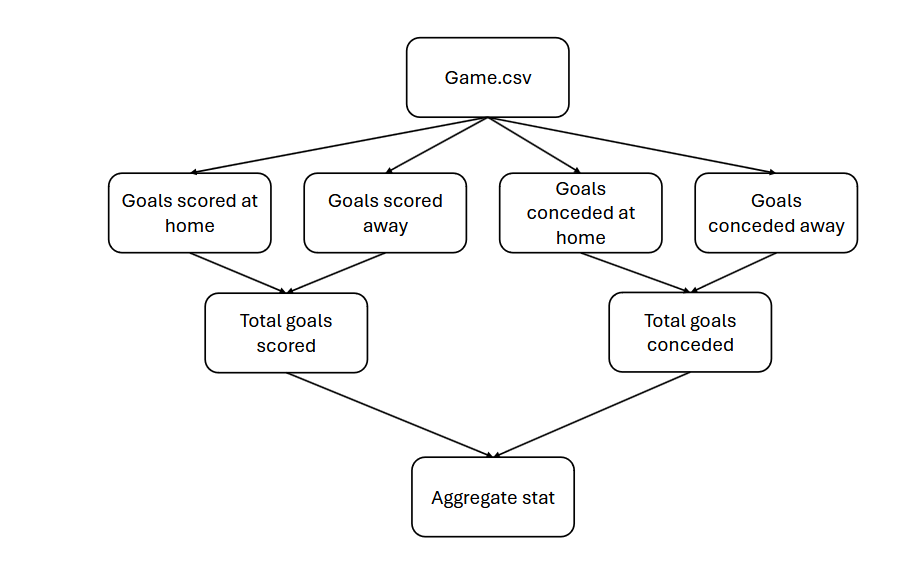

### Visualization


For our visualization, we will use Seaborn !

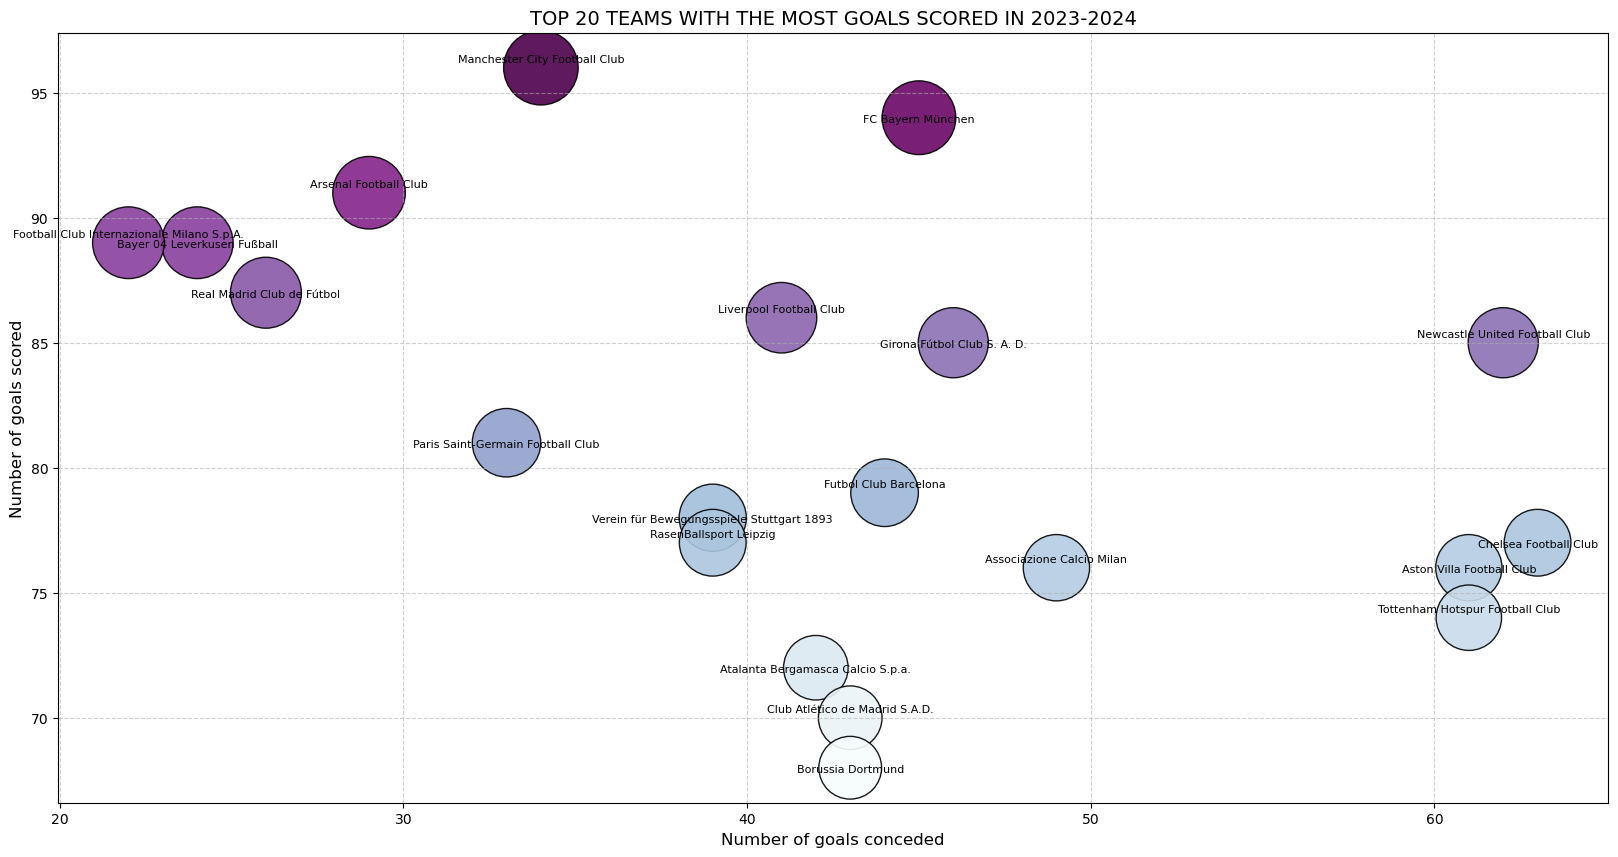

In [8]:
df_ranking_top = stat_club_goal.sort_values(by="total_goals_scored",ascending=False).head(20)

 
bubble_sizes = (df_ranking_top['total_goals_scored'])*30

plt.figure(figsize=(20,10))
plt.scatter(
    df_ranking_top['total_goals_conceded'],                  
    df_ranking_top['total_goals_scored'],           
    s=bubble_sizes,               
    alpha=0.9,                     
    edgecolors="black",                 
    c=df_ranking_top['total_goals_scored'],              
    cmap="BuPu"               
)

for i, team in enumerate(df_ranking_top['name']):#prevent the overlapping of the text
    offset = 0.2 if i % 2 == 0 else -0.2
    plt.text(
        df_ranking_top['total_goals_conceded'].iloc[i],
        df_ranking_top['total_goals_scored'].iloc[i] + offset,
        team, fontsize=8, ha='center'
    )

plt.title("TOP 20 TEAMS WITH THE MOST GOALS SCORED IN 2023-2024", fontsize=14)
plt.ylabel("Number of goals scored", fontsize=12)
plt.xlabel("Number of goals conceded", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



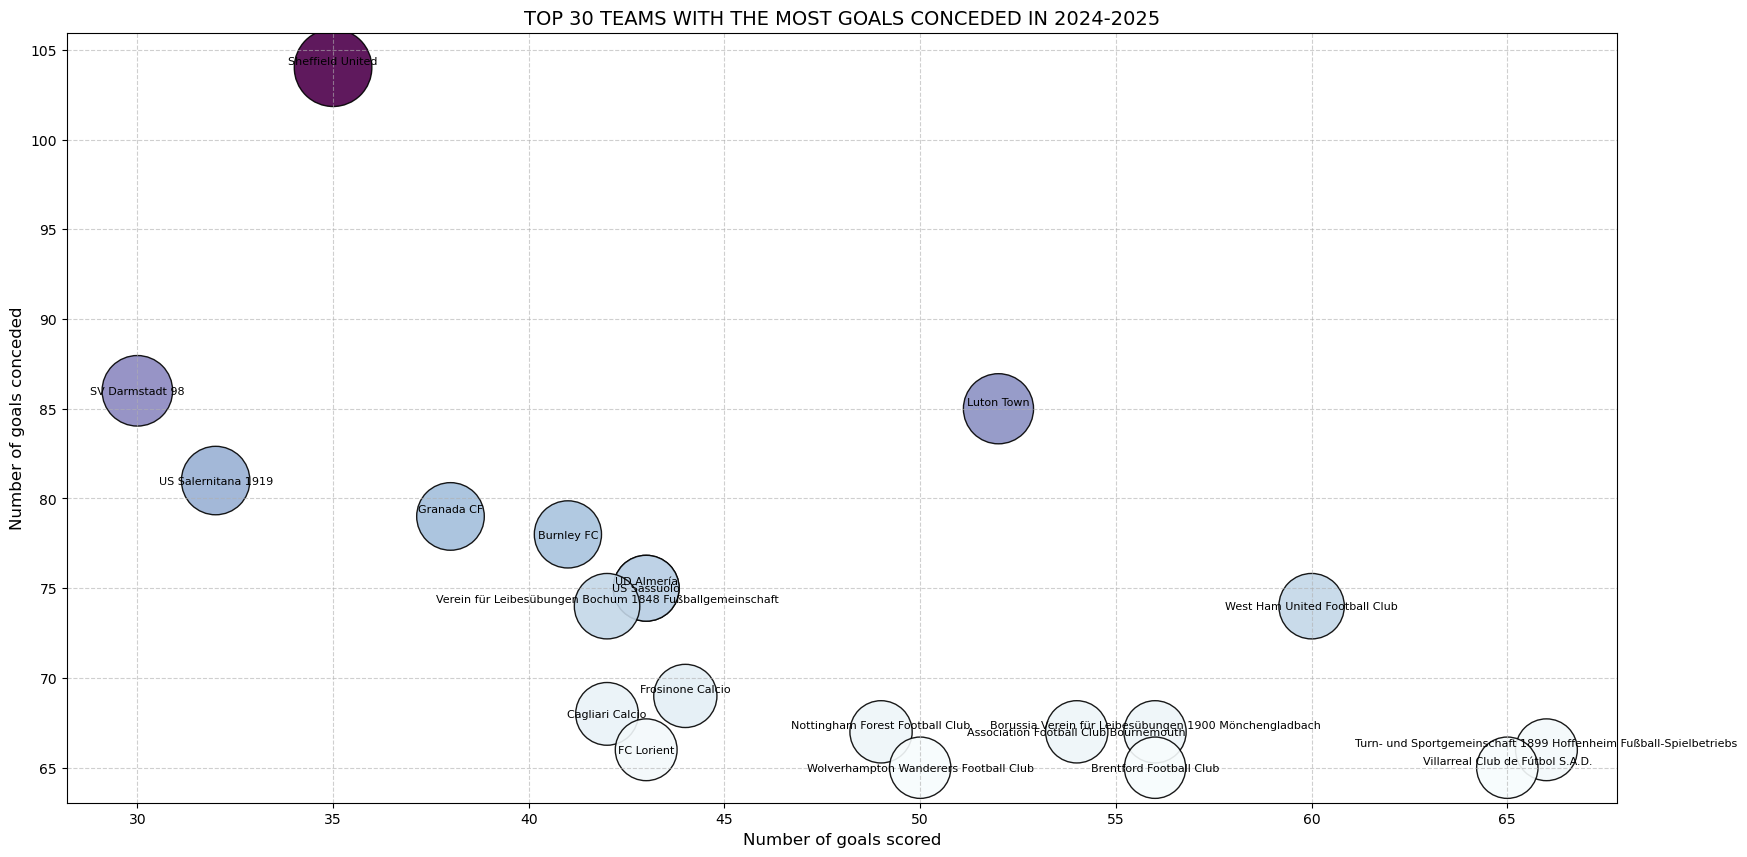

In [9]:
df_ranking_top = stat_club_goal.sort_values(by="total_goals_conceded",ascending=False).head(20)

 
bubble_sizes = (df_ranking_top['total_goals_conceded'])*30

plt.figure(figsize=(20,10))
plt.scatter(
    df_ranking_top['total_goals_scored'],                  
    df_ranking_top['total_goals_conceded'],           
    s=bubble_sizes,               
    alpha=0.9,                     
    edgecolors="black",                 
    c=df_ranking_top['total_goals_conceded'],              
    cmap="BuPu"                
)

for i, team in enumerate(df_ranking_top['name']):
    offset = 0.2 if i % 2 == 0 else -0.2
    plt.text(
        df_ranking_top['total_goals_scored'].iloc[i],
        df_ranking_top['total_goals_conceded'].iloc[i] + offset,
        team, fontsize=8, ha='center'
    )    

plt.title("TOP 30 TEAMS WITH THE MOST GOALS CONCEDED IN 2024-2025", fontsize=14)
plt.ylabel("Number of goals conceded", fontsize=12)
plt.xlabel("Number of goals scored", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
